<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/data - data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.groupby(["yr_built"])["yr_built"].count()

yr_built
1900    22
1901     9
1902    10
1903    10
1904     9
        ..
2010    28
2011    24
2012    33
2013    57
2014    78
Name: yr_built, Length: 115, dtype: int64

In [6]:
numerical=df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]

In [7]:
categorical=df[['street','city','statezip','country']]

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

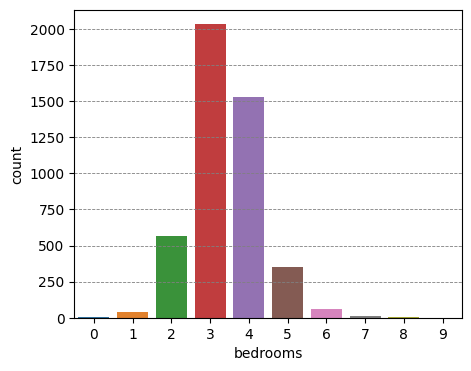

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

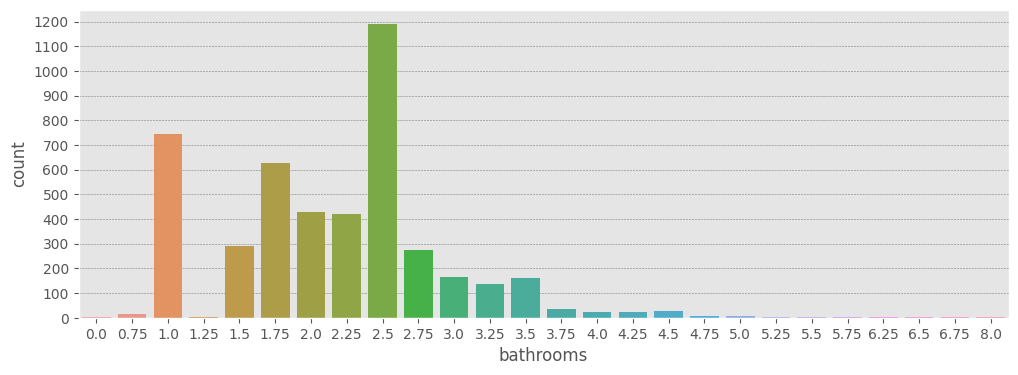

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

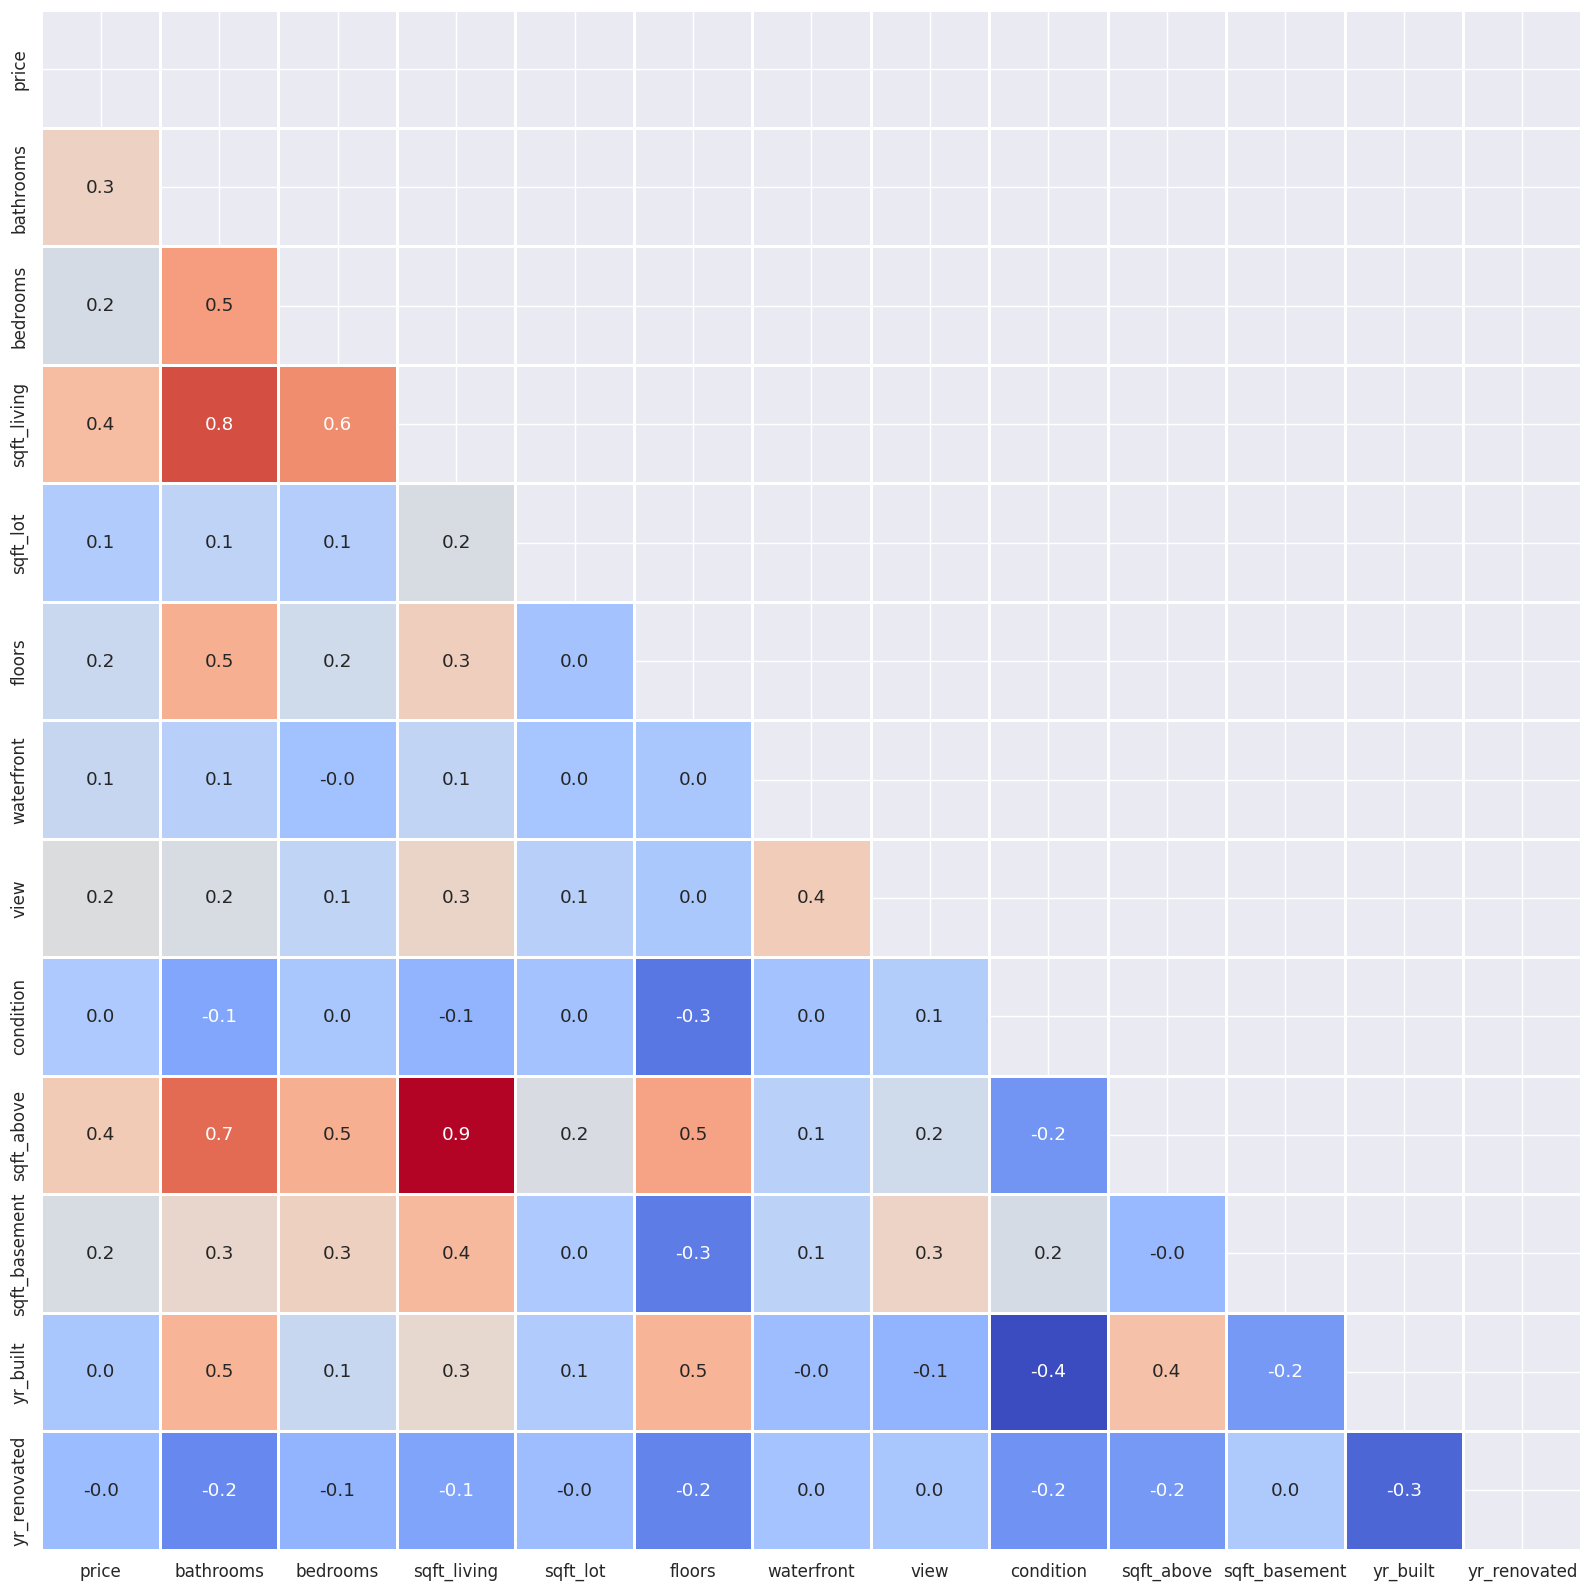

In [ ]:
sns.set(font_scale=1.1)
correlation_train = numerical.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

Median value of house with respect to number of bedrooms : 
 bedrooms
0    1195324.0
1     262500.0
2     369500.0
3     424750.0
4     568000.0
5     580000.0
6     665000.0
7     711500.0
8    1155000.0
9     599999.0
Name: price, dtype: float64


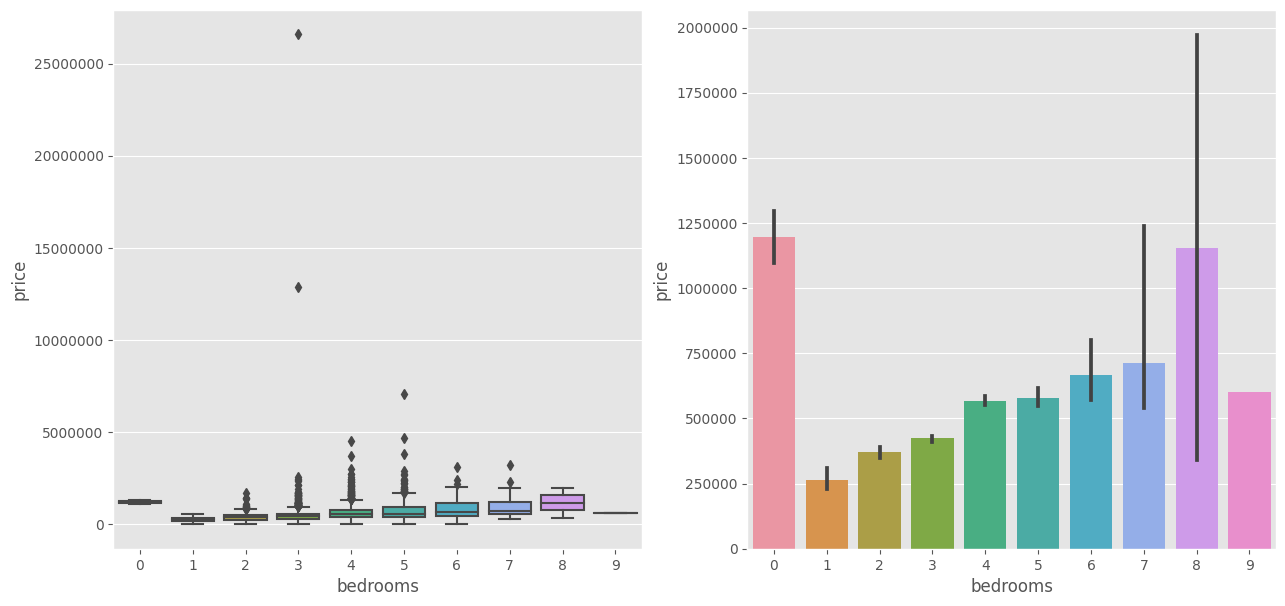

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of bedrooms : \n",df.groupby("bedrooms")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="bedrooms", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of floors : 
 floors
1.0    390700.0
1.5    535000.0
2.0    554000.0
2.5    831500.0
3.0    479500.0
3.5    829250.0
Name: price, dtype: float64


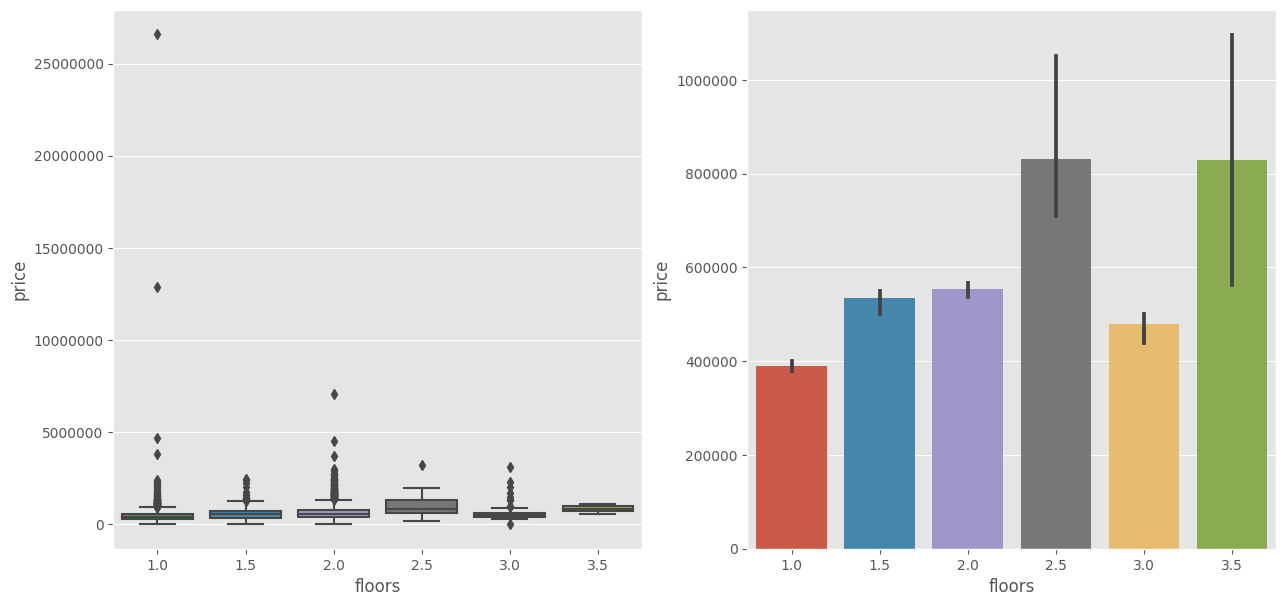

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="floors")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of floors : \n",df.groupby("floors")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="floors",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of condition : 
 condition
1    310000.0
2    250000.0
3    465000.0
4    440000.0
5    550000.0
Name: price, dtype: float64


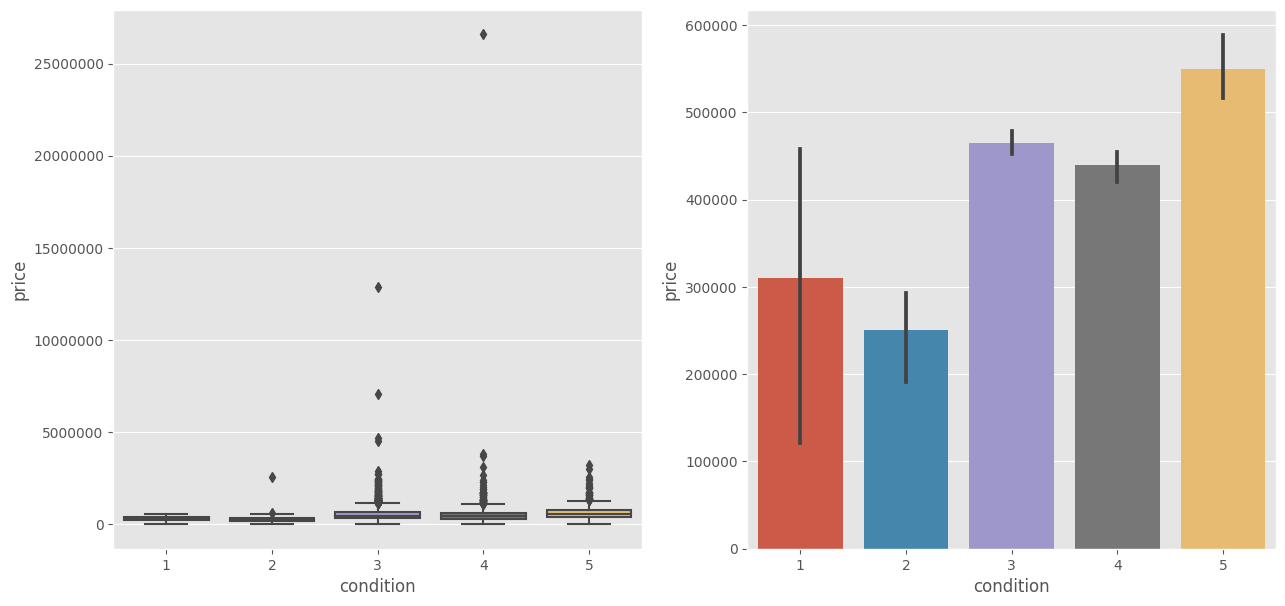

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="condition")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of condition : \n",df.groupby("condition")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="condition", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of waterfront : 
 waterfront
0    460000.0
1    988500.0
Name: price, dtype: float64


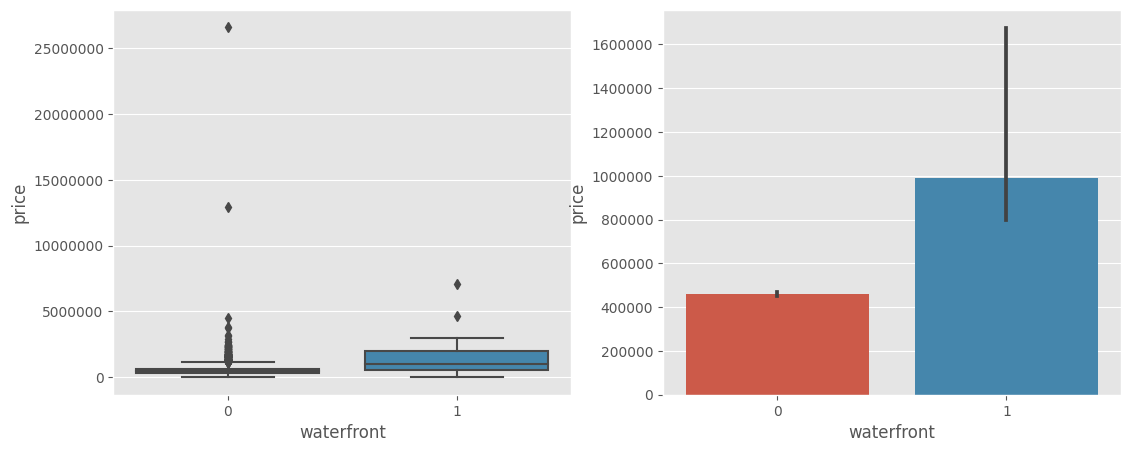

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="waterfront")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of waterfront : \n",df.groupby("waterfront")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="waterfront",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

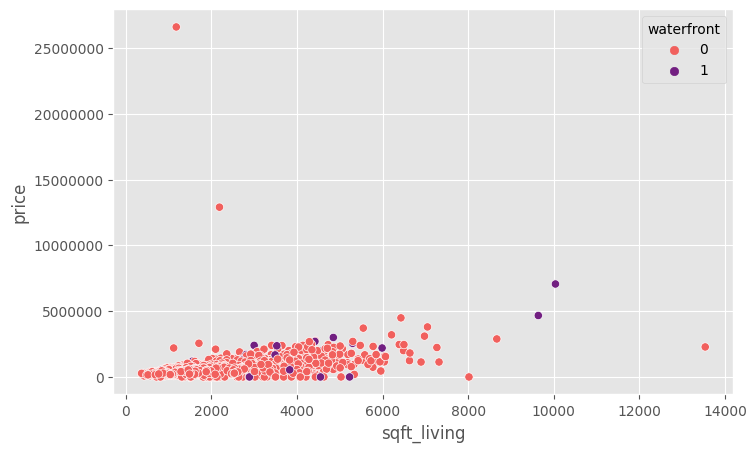

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="waterfront",palette= 'magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

<ipython-input-29-0678088317d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu")


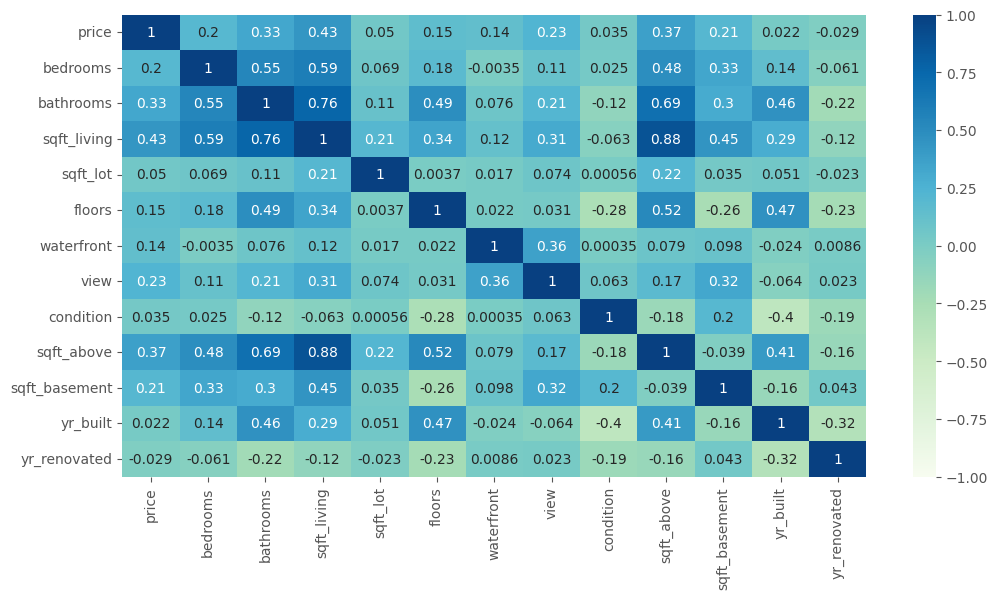

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu")
plt.show()

In [ ]:
from matplotlib.ticker import MaxNLocator


In [ ]:
def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:254: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


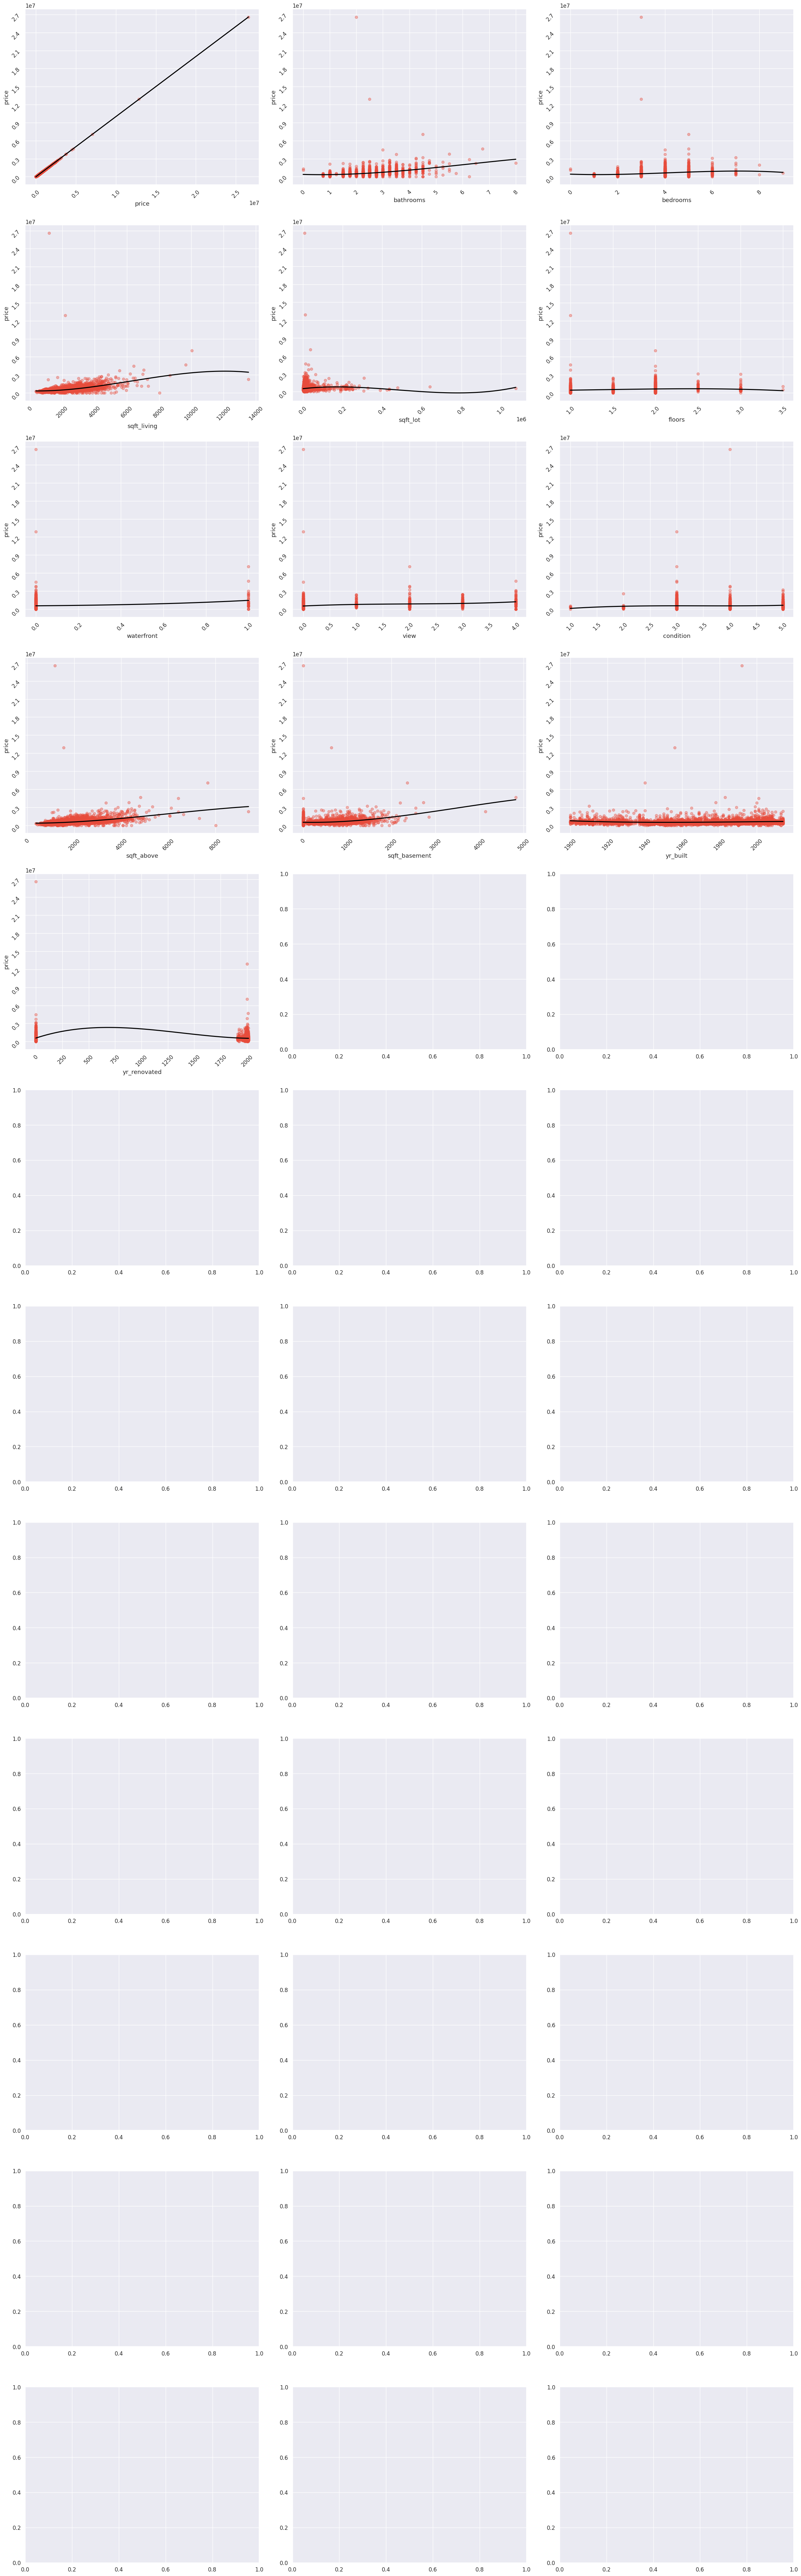

In [ ]:
srt_reg('price', numerical)

<ipython-input-30-422a89ba67c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


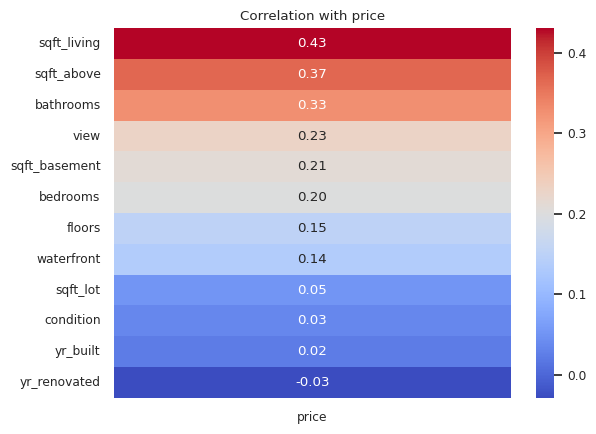

In [30]:
corr = df.corr()
target_corr = corr['price'].drop('price')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with price')
plt.show()

In [ ]:
# import module
from sklearn.preprocessing import StandardScaler
# compute required values
scaler = StandardScaler()
model = scaler.fit(numerical)
scaled_data = model.transform(numerical)

# print scaled data
print(scaled_data)


[[-0.42386353 -0.84320364 -0.44112227 ... -0.67246372 -0.53101376
   1.22167046]
 [ 3.2495981   0.43280154  1.75970468 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.37242442 -0.20520105 -0.44112227 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.23956224  0.43280154 -0.44112227 ... -0.67246372  1.2854179
  -0.82569345]
 [-0.61826787 -0.20520105  0.6592912  ...  1.5254011   0.10810108
  -0.82569345]
 [-0.58775916  0.43280154 -0.44112227 ... -0.67246372  0.64630305
  -0.82569345]]


In [27]:
numerical1=df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data1 = scaler.fit_transform(numerical1)

In [ ]:
print(scaled_data1)

[[-0.42386353 -0.84320364 -0.44112227 ... -0.67246372 -0.53101376
   1.22167046]
 [ 3.2495981   0.43280154  1.75970468 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.37242442 -0.20520105 -0.44112227 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.23956224  0.43280154 -0.44112227 ... -0.67246372  1.2854179
  -0.82569345]
 [-0.61826787 -0.20520105  0.6592912  ...  1.5254011   0.10810108
  -0.82569345]
 [-0.58775916  0.43280154 -0.44112227 ... -0.67246372  0.64630305
  -0.82569345]]


In [6]:
bin_boundaries = [1900, 1920, 1950, 1980, 2000, 2020, 2030]  # Define your own bin boundaries

# Create a new column with the binned values
df['yr_built_bins'] = pd.cut(df['yr_built'], bins=bin_boundaries)


In [7]:
bin_boundary = [0, 1000, 1500, 2000, 2500, 3000, 3500, 4000, df['sqft_above'].max()]  # Define your own bin boundaries

# Create a new column with the binned values
df['sqft_above_bins'] = pd.cut(df['sqft_above'], bins=bin_boundary)


In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_bins,sqft_above_bins
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,"(1950, 1980]","(1000, 1500]"
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,"(1920, 1950]","(3000, 3500]"
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,"(1950, 1980]","(1500, 2000]"
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,"(1950, 1980]","(0, 1000]"
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,"(1950, 1980]","(1000, 1500]"


In [8]:
new_data=df.copy()
new_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
new_data=new_data.drop(['date','street','statezip'],axis=1)

In [10]:
print(" new shape of datasets",new_data.shape)
new_data.head()

b=(new_data.columns)

 new shape of datasets (4600, 15)


In [11]:
new_data['city']=pd.factorize(new_data['city'])[0]
new_data['country']=pd.factorize(new_data['city'])[0]

In [12]:
from sklearn.preprocessing import StandardScaler
a=StandardScaler()
new_data=a.fit_transform(new_data)
new_data=pd.DataFrame(new_data,columns=b)#with the help of the pandas converted into the dataframe
new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857,-0.932857
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706,-0.823706
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556,-0.714556
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405,-0.605405
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255,-0.496255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,-0.823706,-0.823706
4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,-0.605405,-0.605405
4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,1.031852,1.031852
4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,-0.823706,-0.823706


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset and create price bins
# For example, let's create three price categories: Low, Medium, and High
price_bins = [0, 500000, 1000000, df['price'].max()]
price_labels = ['Low Price', 'Medium Price', 'High Price']

# Assign labels to the data based on the price bins
df['Price_Category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)



In [15]:
df.dropna(inplace=True,axis=0)

In [21]:
# Split the data into features (X) and the target variable (y)
X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built"]]
y = df['Price_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

In [20]:
y_train.isna().sum()

40

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
y_train = y_train.fillna(y_train.mode())

# Now you can proceed with the classification
# ...

# Create and train the Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.703622392974753


In [39]:
df.groupby(["yr_built"])["yr_built"].count()

1898    Medium Price
1370    Medium Price
3038    Medium Price
2361      High Price
156     Medium Price
            ...     
3519       Low Price
43         Low Price
564       High Price
4103      High Price
3111    Medium Price
Name: Price_Category, Length: 100, dtype: category
Categories (3, object): ['Low Price' < 'Medium Price' < 'High Price']

In [22]:
# Create and train the k-NN classifier
k = 5  # You can adjust this value
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6641053787047201
